<a href="https://colab.research.google.com/github/Ang-Li-code/MAT422/blob/main/HW_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Set up code
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Concepts in Calculus, Part 2

The following code will provide examples that demonstrate a few selected principles observed in the subjects of
- Necessary and sufficient conditions of local minimizers
- Convexity and global minimizers
- Gradient descent

## Local minimizers

Lef $f:\mathbb{R}^d \rightarrow \mathbb{R}$. The point $\textbf{x}^* \in \mathbb{R}^d$ is a local minimizer of $f$ over $\mathbb{R}^d$ if there is $\delta > 0$ such that

$$
f(\textbf{x}) \geq f(\textbf{x}), \quad \forall \textbf{x} \in B_{\delta}(\textbf{x}^*) \setminus \{\textbf{x}^*\}
$$

<br>

To solve for local minimizers, we can use the following theorem:

Let $f:\mathbb{R}^d \rightarrow \mathbb{R}$ be twice continuously differentiable on $\mathbb{R}^d$. If $\nabla f(\textbf{x}_0) = \textbf{0}$ and $\textbf{H}_f(\textbf{x}_0)$ is positive definite, then $\textbf{x}$ is a strict local minimizer.

<br>

The following code will demonstrate the utilization of the above principles to find the local minimums of a single variable function.

f(x) =  2*x**4 + 5*x**3 - 10*x**2 - 3*x + 2
f'(x) =  8*x**3 + 15*x**2 - 20*x - 3
f''(x) =  24*x**2 + 30*x - 20

Critical points:  [1, -23/16 - sqrt(433)/16, -23/16 + sqrt(433)/16]
x =  1 is a local minimum.
x =  -23/16 - sqrt(433)/16 is a local minimum.


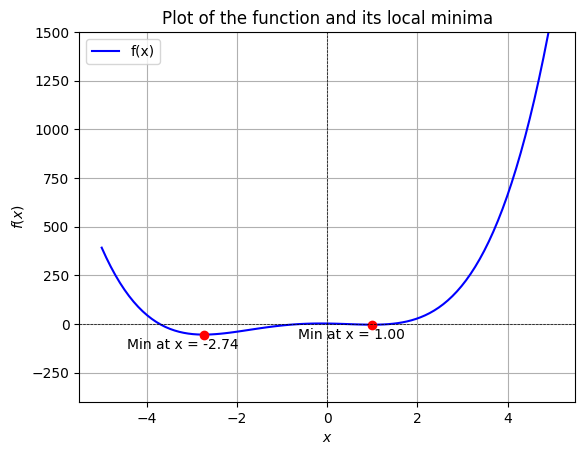

In [28]:
# Define an arbitrary function
x = sp.Symbol('x')
f = 2*x**4 + 5*x**3 - 10*x**2 - 3*x + 2
print("f(x) = ", f)

# Compute the first derivative of the function
f_prime = sp.diff(f, x)
print("f'(x) = ", f_prime)

# Computer the second derivative of the function
f_second_prime = sp.diff(f_prime, x)
print("f''(x) = ", f_second_prime)

print()

# Compute the critical points of the function using the first derivative
critical_points = sp.solve(f_prime, x)
print("Critical points: ", critical_points)

# Determine whether the critical points are local maxima or minima
local_minima = []

for point in critical_points:
    if f_second_prime.subs(x, point) > 0:
        print(f"x =  {point} is a local minimum.")
        local_minima.append(point)

# Plot the function
f_numpy = sp.lambdify(x, f, 'numpy') # Convert f to a numpy function

x_values = np.linspace(-5, 5, 100)
y_values = f_numpy(x_values)

plt.plot(x_values, y_values, label='f(x)', color='blue')
plt.ylim(-400, 1500)

# Plot the local minima
for minimum in local_minima:
    min_val = f.subs(x, minimum)  # Calculate the value of f at the local minimum
    plt.plot(float(minimum), float(min_val), 'ro')  # Plot the local minimum
    plt.annotate(f"Min at x = {float(minimum):.2f}", (float(minimum), float(min_val)),
                 textcoords="offset points", xytext=(-15,-10), ha='center')

# Customize the plot
plt.title('Plot of the function and its local minima')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.legend()
plt.show()